In [53]:
import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [54]:
# Set the random seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [55]:
# Load the fear and greed sentiment data for Bitcoin
csv_path = Path('../Resources/hotel_bookings.csv')

df = pd.read_csv(csv_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [56]:
def hotel_df(df, hotel):
    rslt_df = df.loc[df['hotel'].isin(hotel)]
    return rslt_df

In [57]:
City_hotel = hotel_df(df, ['City Hotel'])

In [58]:
Resort_hotel = hotel_df(df, ['Resort Hotel'])

In [59]:
drop_columns = [
    'hotel'
]
City_hotel = City_hotel.drop(drop_columns, axis=1)
City_hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [60]:
drop_columns = [
    'hotel'
]
Resort_hotel = Resort_hotel.drop(drop_columns, axis=1)
Resort_hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
df = Resort_hotel

In [62]:
import calendar

name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}

df["arrival_date_month"] = df["arrival_date_month"].apply(lambda x: name_to_num[x])
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,342,2015,7,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,7,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,7,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,7,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,7,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
#combine year, months, day
date = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
date_df = date['arrival_date_year'].map(str) + '-' + date['arrival_date_month'].map(str) + '-' + date['arrival_date_day_of_month'].map(str)
date = pd.to_datetime(date_df)

df['date'] = date
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,0,342,2015,7,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,0,737,2015,7,27,1,0,0,2,0.0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,0,7,2015,7,27,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,0,13,2015,7,27,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,0,14,2015,7,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [64]:
index_names = df[df['adr']<=20.0].index
df.drop(index_names, inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
2,0,7,2015,7,27,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,0,13,2015,7,27,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,0,14,2015,7,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
5,0,14,2015,7,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
6,0,0,2015,7,27,1,0,2,2,0.0,...,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01


In [65]:
index_names = df[
    (df['market_segment']==('Aviation'))
    & (df['market_segment']==('Complementary'))
    & (df['market_segment']==('Corporate'))
    & (df['market_segment']==('Undefined'))
    & (df['meal']==('Undefined'))
    ].index
df.drop(index_names, inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
2,0,7,2015,7,27,1,0,1,1,0.0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,0,13,2015,7,27,1,0,1,1,0.0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,0,14,2015,7,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
5,0,14,2015,7,27,1,0,2,2,0.0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
6,0,0,2015,7,27,1,0,2,2,0.0,...,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01


In [66]:
# Drop unnecessary columns leave lead time 
drop_columns = [
    'arrival_date_day_of_month',
    'deposit_type', 
    'is_canceled', 
    'booking_changes', 
    'days_in_waiting_list',
    'agent',
    'company',
    'reservation_status',
    'reservation_status_date',
    'customer_type',
    'assigned_room_type',
    'distribution_channel',
    'market_segment',
    'distribution_channel',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'assigned_room_type',
    'total_of_special_requests',
    'adults',
    'children',
    'babies',
    'required_car_parking_spaces',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'meal',
    'market_segment',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type'
    
]
df = df.drop(drop_columns, axis=1)
df.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,country,adr,date
2,7,2015,7,27,GBR,75.0,2015-07-01
3,13,2015,7,27,GBR,75.0,2015-07-01
4,14,2015,7,27,GBR,98.0,2015-07-01
5,14,2015,7,27,GBR,98.0,2015-07-01
6,0,2015,7,27,PRT,107.0,2015-07-01


In [67]:
df = df.dropna()
df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,country,adr,date
2,7,2015,7,27,GBR,75.00,2015-07-01
3,13,2015,7,27,GBR,75.00,2015-07-01
4,14,2015,7,27,GBR,98.00,2015-07-01
5,14,2015,7,27,GBR,98.00,2015-07-01
6,0,2015,7,27,PRT,107.00,2015-07-01
...,...,...,...,...,...,...,...
40055,212,2017,8,35,GBR,89.75,2017-08-31
40056,169,2017,8,35,IRL,202.27,2017-08-30
40057,204,2017,8,35,IRL,153.57,2017-08-29
40058,211,2017,8,35,GBR,112.80,2017-08-31


In [68]:
def country_df(df, country):
    rslt_df = df.loc[df['country'].isin(country)]
    return rslt_df

In [69]:
X = country_df(df, ['BRA'])

In [70]:
drop_columns = [
    'country'
]
X = X.drop(drop_columns, axis=1)
X.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,adr,date
312,48,2015,7,29,123.0,2015-07-12
634,8,2015,7,30,173.0,2015-07-24
643,8,2015,7,30,173.0,2015-07-24
804,20,2015,7,31,193.0,2015-07-30
1159,2,2015,8,34,153.0,2015-08-16


In [71]:
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,adr,date
312,48,2015,7,29,123.00,2015-07-12
634,8,2015,7,30,173.00,2015-07-24
643,8,2015,7,30,173.00,2015-07-24
804,20,2015,7,31,193.00,2015-07-30
1159,2,2015,8,34,153.00,2015-08-16
...,...,...,...,...,...,...
39615,12,2017,8,34,224.00,2017-08-21
39782,2,2017,8,34,227.81,2017-08-25
39836,40,2017,8,35,204.16,2017-08-28
39907,19,2017,8,35,153.00,2017-08-30


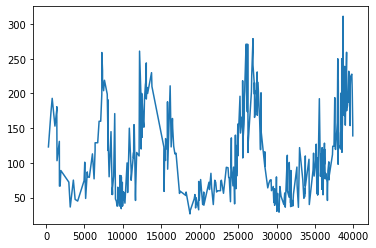

In [72]:
X.adr.plot()

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

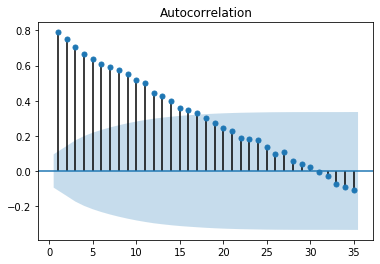

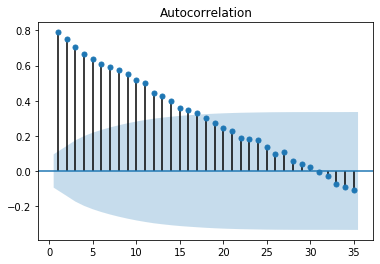

In [74]:
# Plot the autocorrelation of the adr Prices
plot_acf(X.adr, zero=False, lags=35)

### ARIMA MODEL

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
# Create an ARIMA model
model = ARIMA(X.adr.values, order=(1, 1, 1))

In [77]:
# Fit the model to the data
results = model.fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  425
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2123.587
Method:                       css-mle   S.D. of innovations             35.776
Date:                Mon, 24 Aug 2020   AIC                           4255.175
Time:                        18:09:01   BIC                           4271.383
Sample:                             1   HQIC                          4261.578
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.718      0.058      0.954      -1.366       1.449
ar.L1.D.y      0.0956      0.093      1.024      0.306      -0.087       0.279
ma.L1.D.y     -0.6272      0.076     -8.266      0.000      -0.776      -0.478
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.4573           +0.0000j           10.4573            0.0000
MA.1            1.5944           +0.0000j            1.5944            0.0000
-----------------------------------------------------------------------------
"""

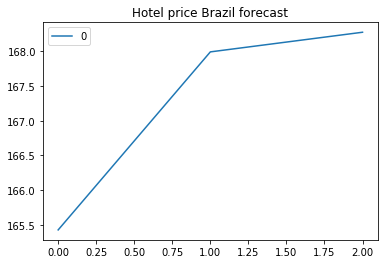

In [79]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Hotel price Brazil forecast")

In [80]:
X.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,adr
count,426.000000,426.000000,426.000000,426.000000,426.000000
mean,75.124413,2016.356808,6.326291,26.115023,110.819531
std,72.409691,0.675217,3.062350,13.641059,62.572283
min,0.000000,2015.000000,1.000000,1.000000,26.500000
25%,16.000000,2016.000000,4.000000,17.000000,58.000000
50%,50.500000,2016.000000,7.000000,27.000000,93.335000
75%,119.750000,2017.000000,8.000000,35.000000,155.000000
max,342.000000,2017.000000,12.000000,53.000000,311.250000


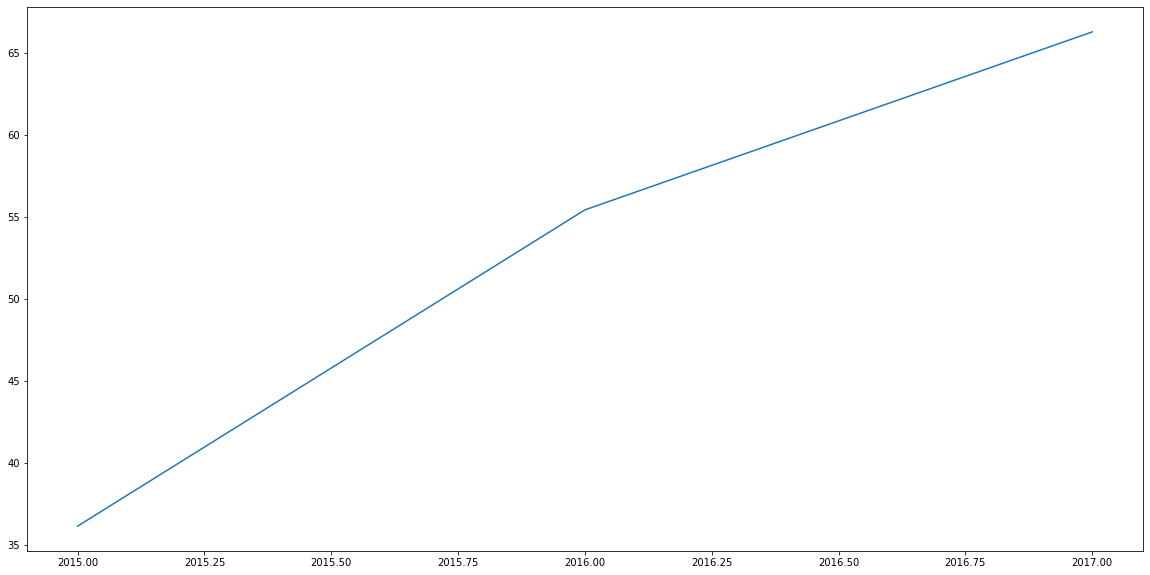

In [81]:
df.loc['2015':'2017'].adr.plot(figsize=(20,10))

In [82]:
def market_segment(df, list):
    index_names = df[
        (df['market_segment']==(list[0]))
        & (df['market_segment']==(list[1]))
        & (df['market_segment']==(list[2]))
        & (df['market_segment']==(list[3]))
        & (df['meal']==(list[0]))
        ].index
    df.drop(index_names, inplace=True)
    return df

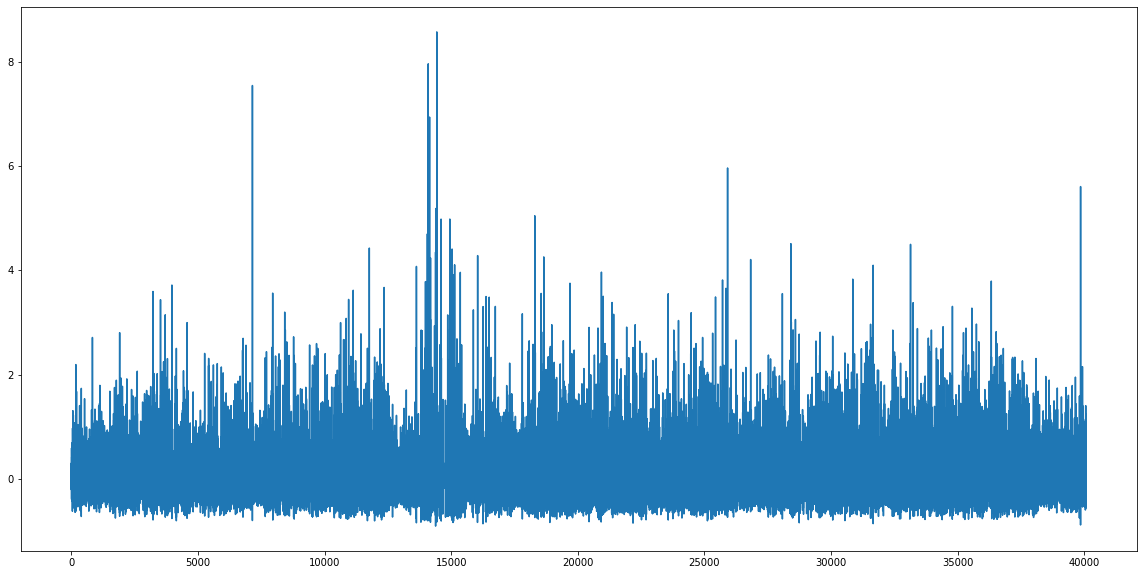

In [83]:
df['adr'].pct_change().plot(x = "date", figsize=(20,10))

### Decision-trees

In [157]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


In [207]:
# Define features set
X = df.copy()
X.drop("country", axis=1, inplace=True)
X.drop("date", axis=1, inplace=True)

X.dropna()
X.reset_index(inplace=True) 




In [208]:
X.head()

,index,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,adr,Quality
0,2,7,2015,7,27,75.0,1
1,3,13,2015,7,27,75.0,1
2,4,14,2015,7,27,98.0,1
3,5,14,2015,7,27,98.0,1
4,6,0,2015,7,27,107.0,2


In [226]:
## 1 is cheap, 2 is mid, 3 is high
y = pd.cut(X["adr"], bins=[0, 100, 200, 600], include_lowest=True, labels=[1, 2, 3])
y.head()


0    1
1    1
2    1
3    1
4    2
Name: adr, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [259]:
#X.drop("adr", axis=1, inplace=True)



In [262]:
X.drop("Quality", axis=1, inplace=True)

In [263]:
X.head()

,index,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number
0,2,7,2015,7,27
1,3,13,2015,7,27
2,4,14,2015,7,27
3,5,14,2015,7,27
4,6,0,2015,7,27


In [264]:

X.isna().sum()

index                       0
lead_time                   0
arrival_date_year           0
arrival_date_month          0
arrival_date_week_number    0
dtype: int64

In [265]:
X.describe()

,index,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number
count,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000
mean,20088.459155,94.153836,2016.128029,6.539138,27.114763
std,11625.872513,97.270854,0.722377,3.164748,13.927756
min,2.000000,0.000000,2015.000000,1.000000,1.000000
25%,9876.500000,11.000000,2016.000000,4.000000,16.000000
50%,20224.000000,60.000000,2016.000000,7.000000,28.000000
75%,30168.500000,156.000000,2017.000000,9.000000,38.000000
max,40059.000000,709.000000,2017.000000,12.000000,53.000000


In [266]:
# Define target vector
#y = df[["Quality"]]
#y[:5]
#y.reset_index(inplace = True )

In [267]:
y.isna().sum()

0

In [268]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [269]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [270]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [271]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [280]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_leaf_nodes = 100 )

In [281]:
# Fitting the model

model = model.fit(X_train_scaled, y_train)


In [282]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


In [283]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2",  "Actual 3"], columns=["Predicted 1", "Predicted 2", "Predictied 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [284]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predictied 3
Actual 1,5927,351,0
Actual 2,619,1772,200
Actual 3,10,351,438


Accuracy Score : 0.8416425320645429
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.94      0.92      6278
           2       0.72      0.68      0.70      2591
           3       0.69      0.55      0.61       799

    accuracy                           0.84      9668
   macro avg       0.77      0.73      0.74      9668
weighted avg       0.84      0.84      0.84      9668



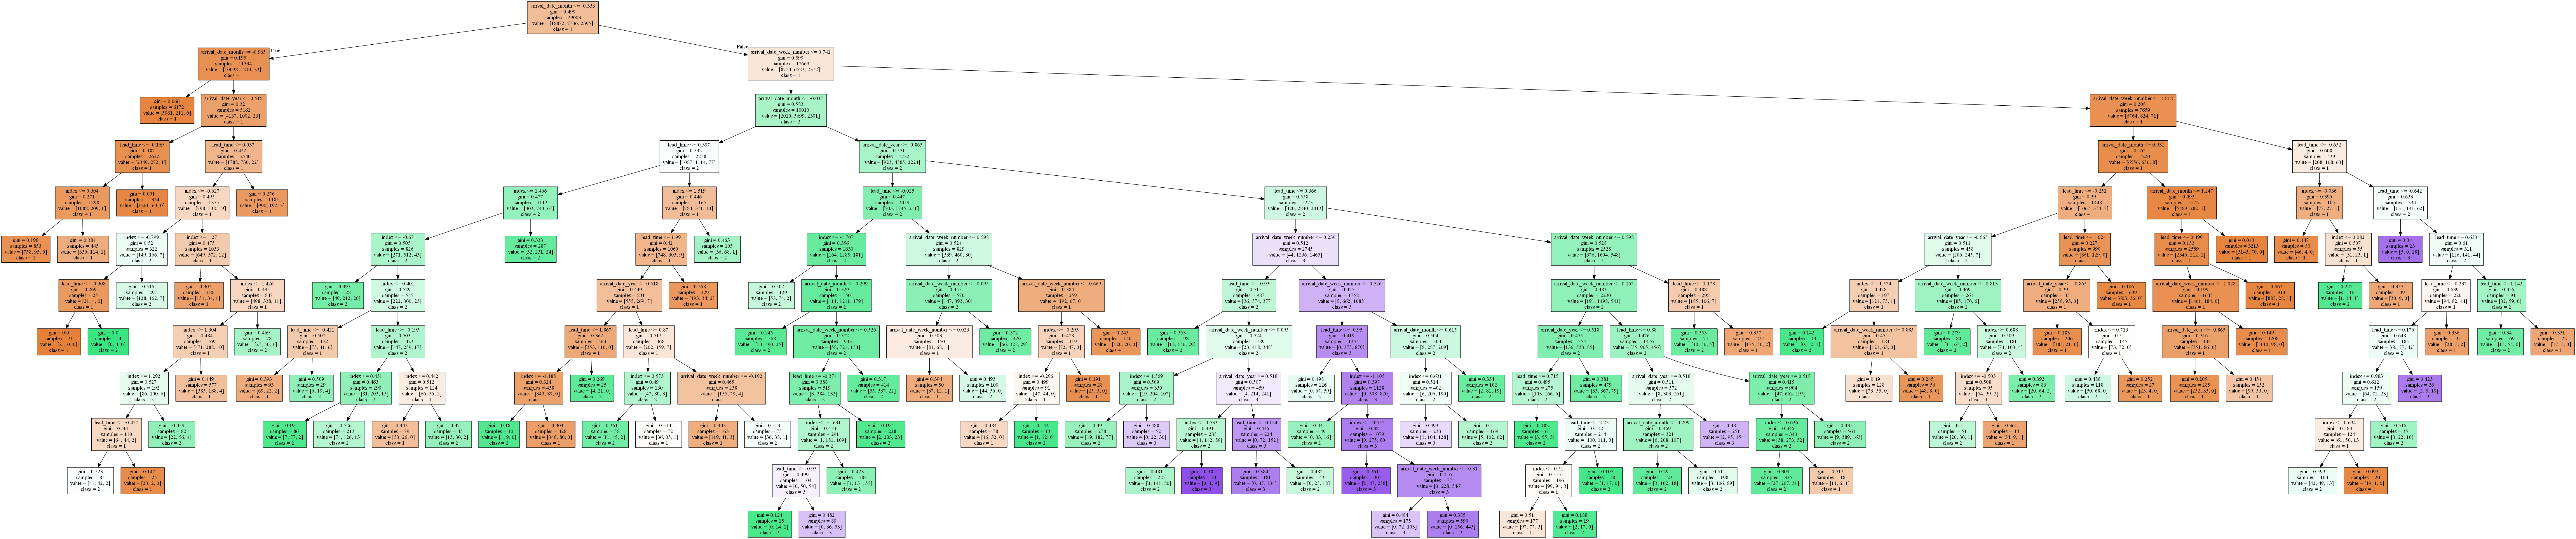

In [285]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["1", "2", "3"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [287]:
model.feature_importances_  #0.47436197

array([0.04469143, 0.12572638, 0.05901183, 0.2962084 , 0.47436197])